<a href="https://colab.research.google.com/github/meghachopra08/Market_Basket_Analysis/blob/main/Market_Basket_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [ ]:
data = pd.read_csv(
    "/content/drive/MyDrive/grocery_dataset - grocery_dataset.csv",
    header=None,
    prefix="item_"
)

print(
    f"There were a total of {data.shape[0]:,} transactions, each containing",
    f"between {data.notna().sum(axis=1).min()} and {data.shape[1]} items."
)
data.head()

There were a total of 9,835 transactions, each containing between 1 and 32 items.


,item_0,item_1,item_2,item_3,item_4,item_5,item_6,item_7,item_8,item_9,...,item_22,item_23,item_24,item_25,item_26,item_27,item_28,item_29,item_30,item_31
0,citrus fruit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
import csv
grocery_items = set()
with open("/content/drive/MyDrive/grocery_dataset.txt") as f:
    reader = csv.reader(f, delimiter=",")
    for i, line in enumerate(reader):
        grocery_items.update(line)

output_list = list()
with open("/content/drive/MyDrive/grocery_dataset.txt") as f:
    reader = csv.reader(f, delimiter=",")
    for i, line in enumerate(reader):
        row_val = {item:0 for item in grocery_items}
        row_val.update({item:1 for item in line})
        output_list.append(row_val)
grocery = pd.DataFrame(output_list)

grocery.head()

,male cosmetics,long life bakery product,pet care,frozen chicken,flour,chocolate,cream cheese,rice,soft cheese,yogurt,...,flower (seeds),vinegar,other vegetables,liquor (appetizer),fruit/vegetable juice,cocoa drinks,spices,fish,bottled water,tropical fruit
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
grocery.columns.tolist()

['male cosmetics',
 'long life bakery product',
 'pet care',
 'frozen chicken',
 'flour',
 'chocolate',
 'cream cheese ',
 'rice',
 'soft cheese',
 'yogurt',
 'pip fruit',
 'butter milk',
 'dessert',
 'female sanitary products',
 'soda',
 'Instant food products',
 'cereals',
 'liquor',
 'preservation products',
 'onions',
 'jam',
 'cooking chocolate',
 'misc. beverages',
 'cat food',
 'instant coffee',
 'ketchup',
 'sound storage medium',
 'flower soil/fertilizer',
 'zwieback',
 'canned fish',
 'seasonal products',
 'cake bar',
 'ham',
 'kitchen towels',
 'ice cream',
 'toilet cleaner',
 'cream',
 'roll products ',
 'dishes',
 'popcorn',
 'frozen fish',
 'cleaner',
 'potato products',
 'frozen potato products',
 'UHT-milk',
 'dish cleaner',
 'napkins',
 'detergent',
 'make up remover',
 'sugar',
 'oil',
 'mayonnaise',
 'hair spray',
 'grapes',
 'house keeping products',
 'hard cheese',
 'sauces',
 'pudding powder',
 'turkey',
 'white wine',
 'prosecco',
 'canned vegetables',
 'tea',
 '

In [ ]:
total_item_count = sum(grocery.sum())
print("Total Item : ", total_item_count)
print()
item_summary = grocery.sum().sort_values(ascending = False).reset_index()
item_summary.rename(columns={item_summary.columns[0]:'item_name',item_summary.columns[1]:'item_count'}, inplace=True)
print("Item Summary:")
print(item_summary.head())

Total Item :  43367

Item Summary:
          item_name  item_count
0        whole milk        2513
1  other vegetables        1903
2        rolls/buns        1809
3              soda        1715
4            yogurt        1372


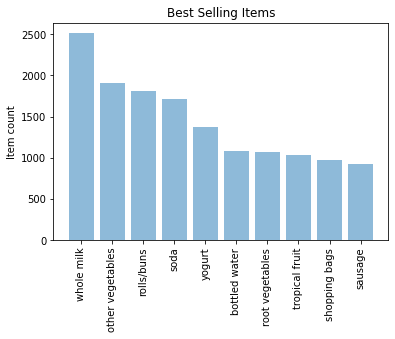

In [ ]:
objects = (list(item_summary['item_name'].head(n=10)))
y_pos = np.arange(len(objects))
performance = list(item_summary['item_count'].head(n=10))

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects, rotation='vertical')
plt.ylabel('Item count')
plt.title('Best Selling Items')
plt.show()

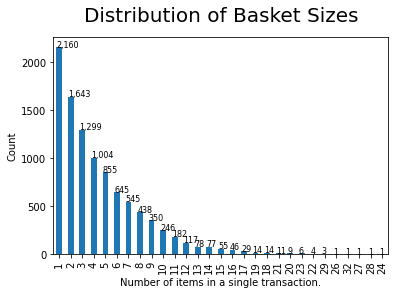

In [ ]:
basket_sizes = data.notna().apply(sum, axis=1)

ax = basket_sizes.value_counts().plot.bar()
ax.set_title("Distribution of Basket Sizes", size=20, weight=500, pad=15)
ax.set_ylabel("Count")
ax.set_xlabel("Number of items in a single transaction.")

for p in ax.patches:
    ax.annotate(f"{p.get_height():,}", xy=(p.get_x(), p.get_height()), size=8)

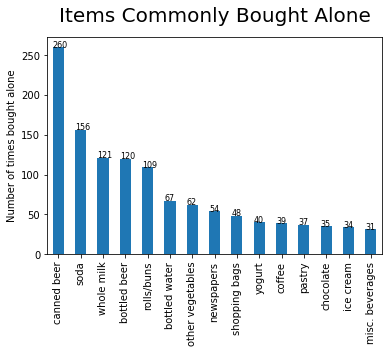

In [ ]:
single_items = data[basket_sizes == 1]["item_0"].value_counts()
ax = single_items.head(15).plot.bar()
ax.set_title("Items Commonly Bought Alone", size=20, pad=15, weight=500)
ax.set_ylabel("Number of times bought alone")

for p in ax.patches:
    ax.annotate(f"{p.get_height():,}", xy=(p.get_x(), p.get_height()), size=8)

In [ ]:
frequent_itemsets = apriori(grocery, min_support=0.032, use_colnames=True)

In [ ]:
my_rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

In [ ]:
my_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(whole milk),(yogurt),0.255516,0.139502,0.056024,0.219260,1.571735,0.020379,1.102157
1,(yogurt),(whole milk),0.139502,0.255516,0.056024,0.401603,1.571735,0.020379,1.244132
2,(other vegetables),(yogurt),0.193493,0.139502,0.043416,0.224383,1.608457,0.016424,1.109436
3,(yogurt),(other vegetables),0.139502,0.193493,0.043416,0.311224,1.608457,0.016424,1.170929
4,(rolls/buns),(soda),0.183935,0.174377,0.038332,0.208402,1.195124,0.006258,1.042983
5,(soda),(rolls/buns),0.174377,0.183935,0.038332,0.219825,1.195124,0.006258,1.046003
6,(rolls/buns),(whole milk),0.183935,0.255516,0.056634,0.307905,1.205032,0.009636,1.075696
7,(whole milk),(rolls/buns),0.255516,0.183935,0.056634,0.221647,1.205032,0.009636,1.048452
8,(whole milk),(root vegetables),0.255516,0.108998,0.048907,0.191405,1.756031,0.021056,1.101913
9,(root vegetables),(whole milk),0.108998,0.255516,0.048907,0.448694,1.756031,0.021056,1.350401
